In [22]:
import matplotlib.pyplot as plt
import arviz as az
import seaborn as sns
from arviz import InferenceData  # ringdown uses arviz InferenceData objects
from pathlib import Path
import ringdown as rd
from ringdown.result import Result
import numpy as np
%matplotlib widget

# Single run plots #

In [24]:
ifos = ['H1', 'L1']
resultpath = 'fitresults/fit_result_modes_2_start_12.nc'
result = Result.from_netcdf(resultpath)

In [25]:
az.summary(result, var_names=['a', 'm', 'chi', 'f', 'g'])

mean      sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
a[b'1,-2,2,2,0']    0.000   0.000    0.000    0.000      0.000    0.000   
a[b'1,-2,2,2,1']    0.000   0.000    0.000    0.000      0.000    0.000   
m                  67.145   5.735   57.418   77.842      0.163    0.120   
chi                 0.607   0.111    0.408    0.787      0.003    0.002   
f[b'1,-2,2,2,0']  241.963   9.760  225.601  261.020      0.178    0.126   
f[b'1,-2,2,2,1']  235.145  10.059  217.194  253.586      0.185    0.131   
g[b'1,-2,2,2,0']  252.870  29.534  198.220  303.663      0.818    0.578   
g[b'1,-2,2,2,1']  766.532  91.414  596.166  922.189      2.529    1.789   

                  ess_bulk  ess_tail  r_hat  
a[b'1,-2,2,2,0']    2869.0    2588.0    1.0  
a[b'1,-2,2,2,1']    1903.0    1473.0    1.0  
m                   1449.0     985.0    1.0  
chi                 1216.0    1321.0    1.0  
f[b'1,-2,2,2,0']    3019.0    2801.0    1.0  
f[b'1,-2,2,2,1']    2914.0    2559.0    1.0  
g[b'1,-2,2,2,0']    1419.0    1138.0    1.0  
g[b'1,-2,2,2,1']    1413.0    1138.0    1.0

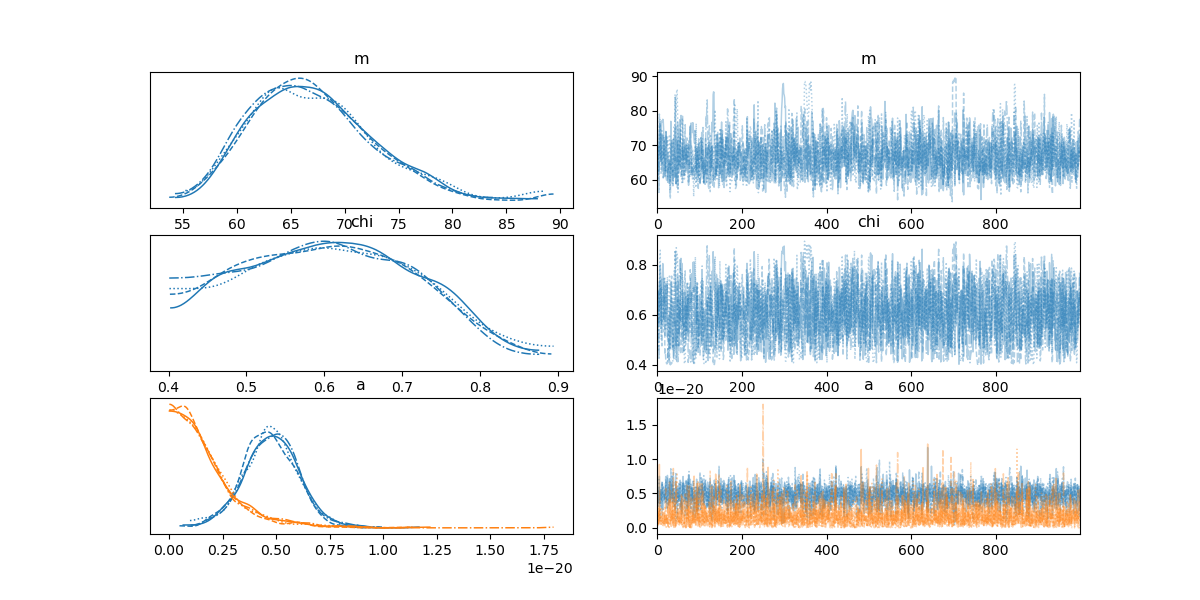

In [26]:
az.plot_trace(result, var_names=['m', 'chi', 'a']);

In [27]:
# this doesn't work with arviz InferenceData objects - find alternative if needed
# draw 500 samples from the posterior
result.get_parameter_dataframe(500, latex=True)

$M / M_\odot$    $\chi$  $f_{220} / \mathrm{Hz}$  \
1167      62.760212  0.529267               243.113708   
1451      67.565384  0.585232               233.943909   
3499      56.508179  0.410132               252.801758   
1608      78.849373  0.740474               226.157364   
34        61.317413  0.478386               241.599518   
...             ...       ...                      ...   
2568      68.425697  0.662774               244.119766   
3468      68.429199  0.616362               235.937851   
2668      64.108917  0.620161               252.511078   
3336      65.174042  0.562697               239.006805   
1279      60.372959  0.453434               242.043747   

      $f_{221} / \mathrm{Hz}$  $\gamma_{220} / \mathrm{Hz}$  \
1167               234.867706                    275.521271   
1451               226.950974                    252.697510   
3499               242.068970                    311.775848   
1608               221.991302                    203.593658   
34                 232.523956                    284.587158   
...                       ...                           ...   
2568               238.202240                    243.524841   
3468               229.417435                    247.360275   
2668               245.602402                    263.726898   
3336               231.474197                    263.415497   
1279               232.518906                    290.141754   

      $\gamma_{221} / \mathrm{Hz}$     $A_{220}$     $A_{221}$  $\phi_{220}$  \
1167                    836.534973  5.202775e-21  2.976363e-21      0.353240   
1451                    766.084961  7.328616e-21  1.644454e-21     -0.318722   
3499                    949.729797  4.293908e-21  1.465542e-21      0.497623   
1608                    614.918884  5.429193e-21  4.956702e-22     -0.463687   
34                      865.269958  4.802320e-21  3.572665e-21      0.207760   
...                            ...           ...           ...           ...   
2568                    736.825806  2.053680e-21  1.197371e-21     -0.175320   
3468                    749.297546  5.198582e-21  1.408915e-22     -0.277281   
2668                    798.797485  3.863104e-21  2.981131e-21     -0.140206   
3336                    799.056824  6.679890e-21  6.098495e-22     -0.075140   
1279                    882.768188  5.538624e-21  4.469437e-22     -0.019200   

      $\phi_{221}$  $\theta_{220}$  $\theta_{221}$  $\epsilon_{220}$  \
1167     -0.607808        1.184089        0.806291         -0.384848   
1451      0.311907        1.297575       -1.424286         -0.197386   
3499      0.237827        1.220747       -0.356673         -0.407610   
1608      0.633058        1.252282       -1.571748         -0.210857   
34        0.197636        1.275719        0.737331         -0.352826   
...            ...             ...             ...               ...   
2568      0.298158        1.520303        0.435024         -0.710729   
3468     -0.569693        1.262834       -0.948506         -0.267464   
2668      0.482679        1.553618        0.501064         -0.286879   
3336      0.409069        1.230615       -1.164518         -0.209391   
1279     -0.117077        1.235701       -0.587103         -0.303486   

      $\epsilon_{221}$  
1167          0.020706  
1451         -0.066628  
3499         -0.653356  
1608          0.398725  
34           -0.070924  
...                ...  
2568         -0.043540  
3468          0.897873  
2668          0.019037  
3336         -0.418538  
1279         -0.315927  

[500 rows x 14 columns]

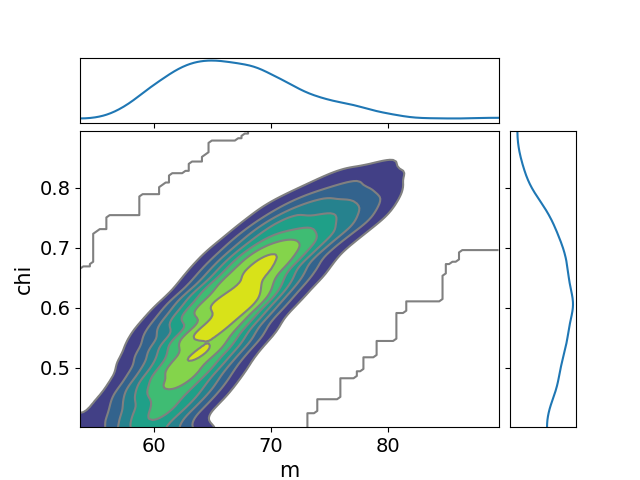

In [28]:
az.plot_pair(result, var_names=['m', 'chi'], marginals=True,
             kind='kde');

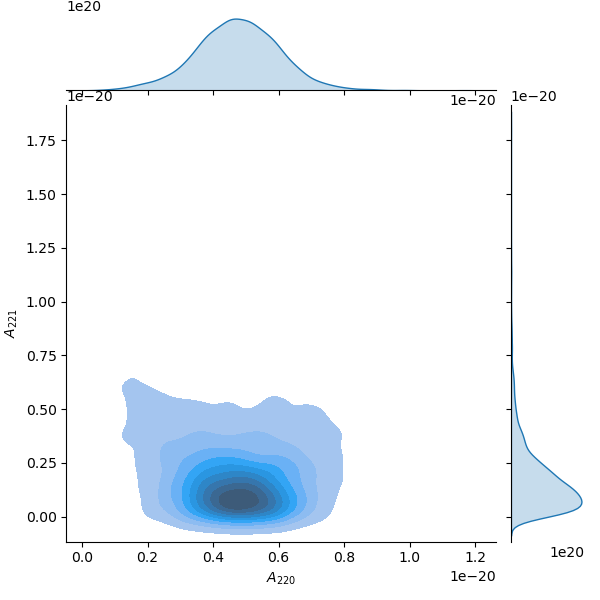

In [29]:
df = result.get_parameter_dataframe()
g = sns.jointplot(x=df['a_220'], y=df['a_221'], kind='kde', fill=True);
g.ax_joint.set_xlabel('$A_{220}$');
g.ax_joint.set_ylabel('$A_{221}$');

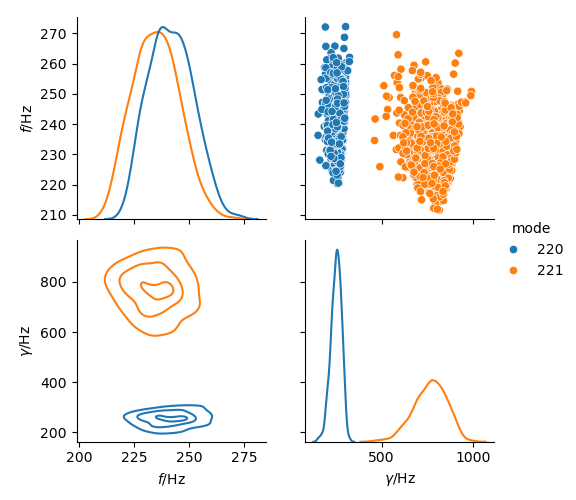

In [30]:
df = result.get_mode_parameter_dataframe(500, latex=True)
key_map = result.get_parameter_key_map(modes=False)

pg = sns.PairGrid(df, vars=[key_map[k] for k in ['f', 'g']],
                  diag_sharey=False, hue='mode')
pg.map_diag(sns.kdeplot);
pg.map_upper(sns.scatterplot);
pg.map_lower(rd.utils.kdeplot, levels=[0.9, 0.5, 0.1]);
pg.add_legend();
plt.show()

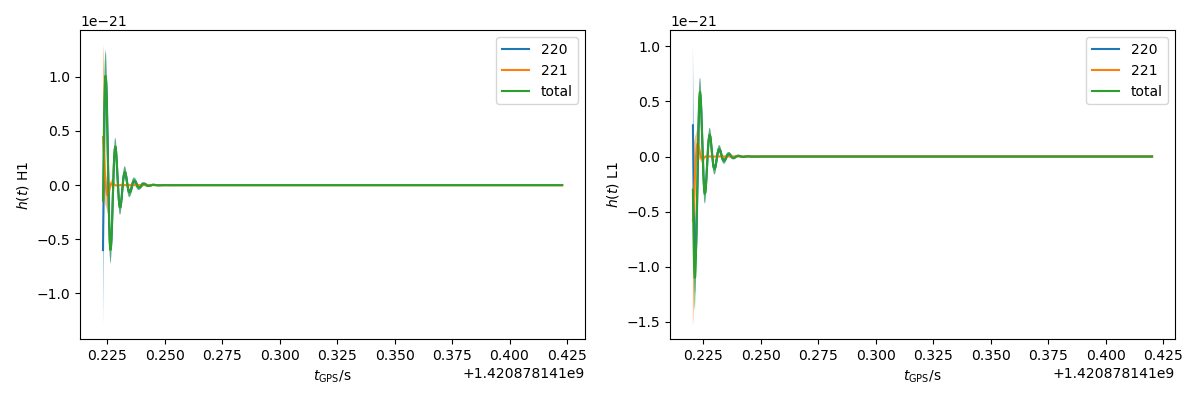

In [31]:
fig, axs = plt.subplots(1, len(ifos), figsize=(12, 4))
axs = np.atleast_1d(axs)
for mode in result.modes:
    hdet_mode_cls = [result.get_strain_quantile(q, mode=mode) for q in [0.5, 0.05, 0.95]]
    for i, ax in zip(ifos, axs):
        m, l, h = [hcl[i] for hcl in hdet_mode_cls]
        ax.plot(m, label=mode.get_label())
        ax.fill_between(m.index, l, h, alpha=0.5)
    
hdet_cls = [result.get_strain_quantile(q) for q in [0.5, 0.05, 0.95]]    
for i, ax in zip(ifos, axs):
    m, l, h = [hcl[i] for hcl in hdet_cls]
        
    ax.plot(m, label='total')
    ax.fill_between(m.index, l, h, alpha=0.5)
    
    #ax.set_xlim(start_times[i]- 0.001,
    #            start_times[i] + 0.025)
    ax.set_xlabel(r'$t_\mathrm{GPS} / \mathrm{s}$')
    ax.set_ylabel(f'$h(t)$ {i}');
    ax.legend();
plt.tight_layout()
plt.show()

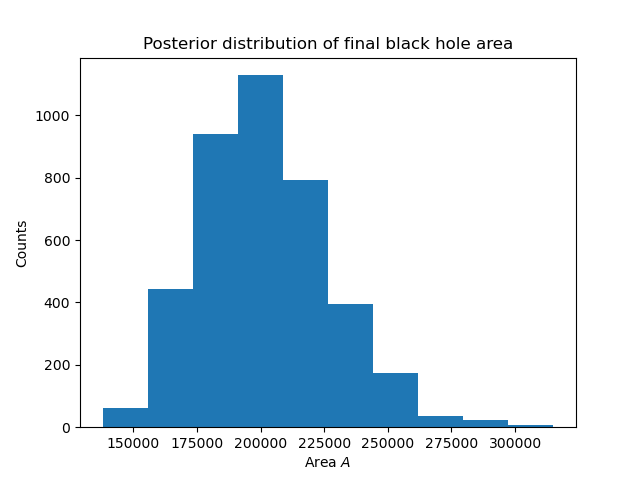

In [32]:
m_post = np.array(result.posterior['m']).flatten()
chi_post = np.array(result.posterior['chi']).flatten()

area = 8*np.pi*m_post**2*(1+np.sqrt(1-chi_post**2))

plt.figure()
plt.hist(area)
plt.title('Posterior distribution of final black hole area')
plt.xlabel(r'Area $A$')
plt.ylabel('Counts')
plt.show()

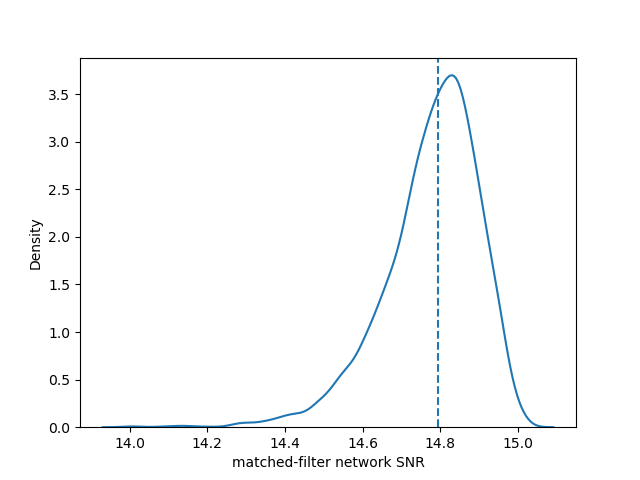

In [33]:
fig = plt.figure()
snrs = result.compute_posterior_snrs(optimal=False, network=True)
sns.kdeplot(snrs)
plt.axvline(np.median(snrs), ls='--')
plt.xlabel('matched-filter network SNR')
plt.show()

# Summary plots of all runs #

In [34]:
# Extract parameters from your configuration
num_modes = [1, 2]
start_offsets = [4, 6, 8, 10.5, 12]

import re
from pathlib import Path
import numpy as np
import arviz as az
from ringdown.result import Result
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

# Configuration
FIT_DIR = Path("./fitresults")
VAR_NAMES = ['m', 'chi']

# Parse filenames - handles format like start_105 for 10.5
pattern = re.compile(r".*modes[_-]?(\d+).*start[_-]?(\d+).*\.nc$", re.IGNORECASE)
files = {}

for p in FIT_DIR.glob("*.nc"):
    m = pattern.match(p.name)
    if not m:
        continue
    modes = int(m.group(1))
    start_int = int(m.group(2))
    # Convert: 105 -> 10.5, 4 -> 4.0, etc.
    start = start_int / 10.0 if start_int >= 100 else float(start_int)
    files[(start, modes)] = p

if not files:
    raise FileNotFoundError(f"No matching result files found in {FIT_DIR}")

print(f"Found {len(files)} result files")

nrows = len(start_offsets)
ncols = len(num_modes)

Found 10 result files


Error for modes=2, start=10.5: Can't synchronously read data (inflate() failed)

Saved combined plot to fitresults_plots/corner_plots_grid.png


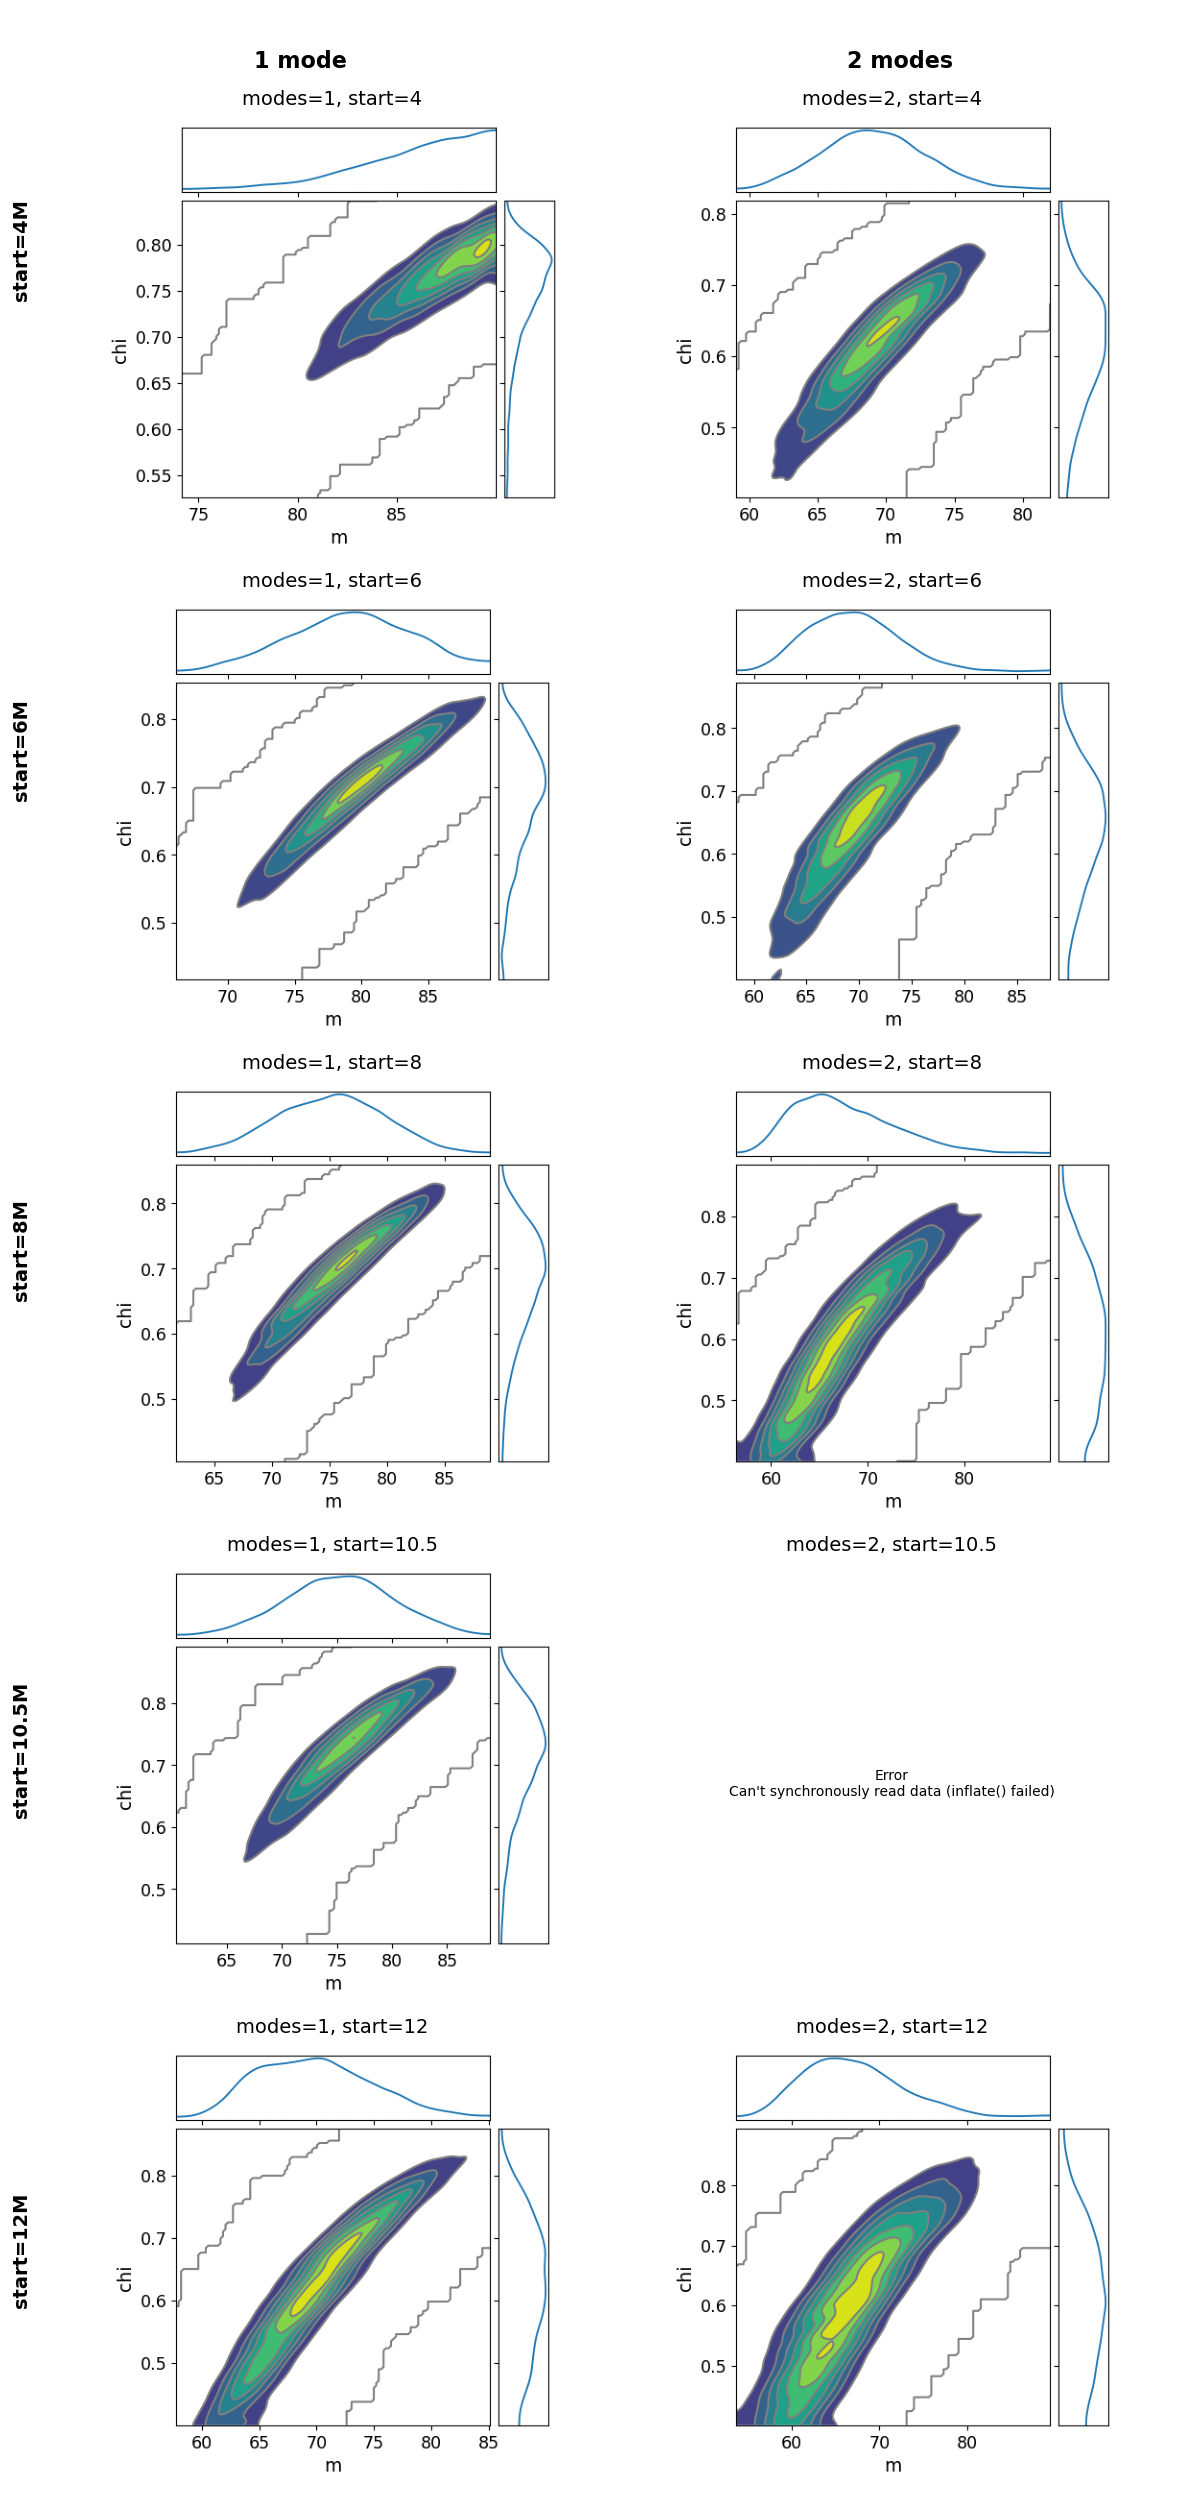

In [35]:
# CORNER PLOT
# Create main figure for the grid
fig, axs = plt.subplots(nrows=nrows, ncols=ncols,
                        figsize=(6 * ncols, 5 * nrows))
axs = np.atleast_2d(axs)

for i, start in enumerate(start_offsets):
    for j, modes in enumerate(num_modes):
        ax = axs[i, j]
        key = (start, modes)
        
        if key not in files:
            ax.text(0.5, 0.5, f"Missing\nstart={start}\nmodes={modes}", 
                   ha='center', va='center', fontsize=12)
            ax.axis('off')
            continue

        path = files[key]
        
        try:
            res = Result.from_netcdf(path)
            
            # Create corner plot - az.plot_pair creates its own figure
            axes = az.plot_pair(
                res, 
                var_names=VAR_NAMES, 
                marginals=True,
                kind='kde',
                figsize=(5, 5)
            )
            
            # Get the figure that was just created
            temp_fig = plt.gcf()
            
            # Convert the plot to an image
            buf = BytesIO()
            temp_fig.savefig(buf, format='png', dpi=100, bbox_inches='tight')
            buf.seek(0)
            plt.close(temp_fig)  # Close to avoid displaying it separately
            
            # Display the image in the grid
            img = Image.open(buf)
            ax.imshow(np.array(img))
            ax.axis('off')
            ax.set_title(f"modes={modes}, start={start}", fontsize=14, pad=10)
            
        except Exception as e:
            ax.text(0.5, 0.5, f"Error\n{str(e)[:100]}", 
                   ha='center', va='center', fontsize=10, wrap=True)
            ax.axis('off')
            ax.set_title(f"modes={modes}, start={start}", fontsize=14, pad=10)
            print(f"Error for modes={modes}, start={start}: {e}")

# Add column labels
for j, modes in enumerate(num_modes):
    fig.text((j + 0.5) / ncols, 0.98, f"{modes} mode{'s' if modes > 1 else ''}", 
             ha='center', va='top', fontsize=16, weight='bold',
             transform=fig.transFigure)

# Add row labels
for i, start in enumerate(start_offsets):
    fig.text(0.01, 1 - (i + 0.5) / nrows, f"start={start}M", 
             ha='left', va='center', fontsize=14, weight='bold',
             transform=fig.transFigure, rotation=90)

plt.tight_layout(rect=[0.02, 0, 1, 0.97])
plt.savefig('fitresults_plots/corner_plots_grid.png', dpi=150, bbox_inches='tight')
print("\nSaved combined plot to fitresults_plots/corner_plots_grid.png")

Error for modes=2, start=10.5: Can't synchronously read data (inflate() failed)

Saved combined plot to fitresults_plots/amplitude_plots_grid.png


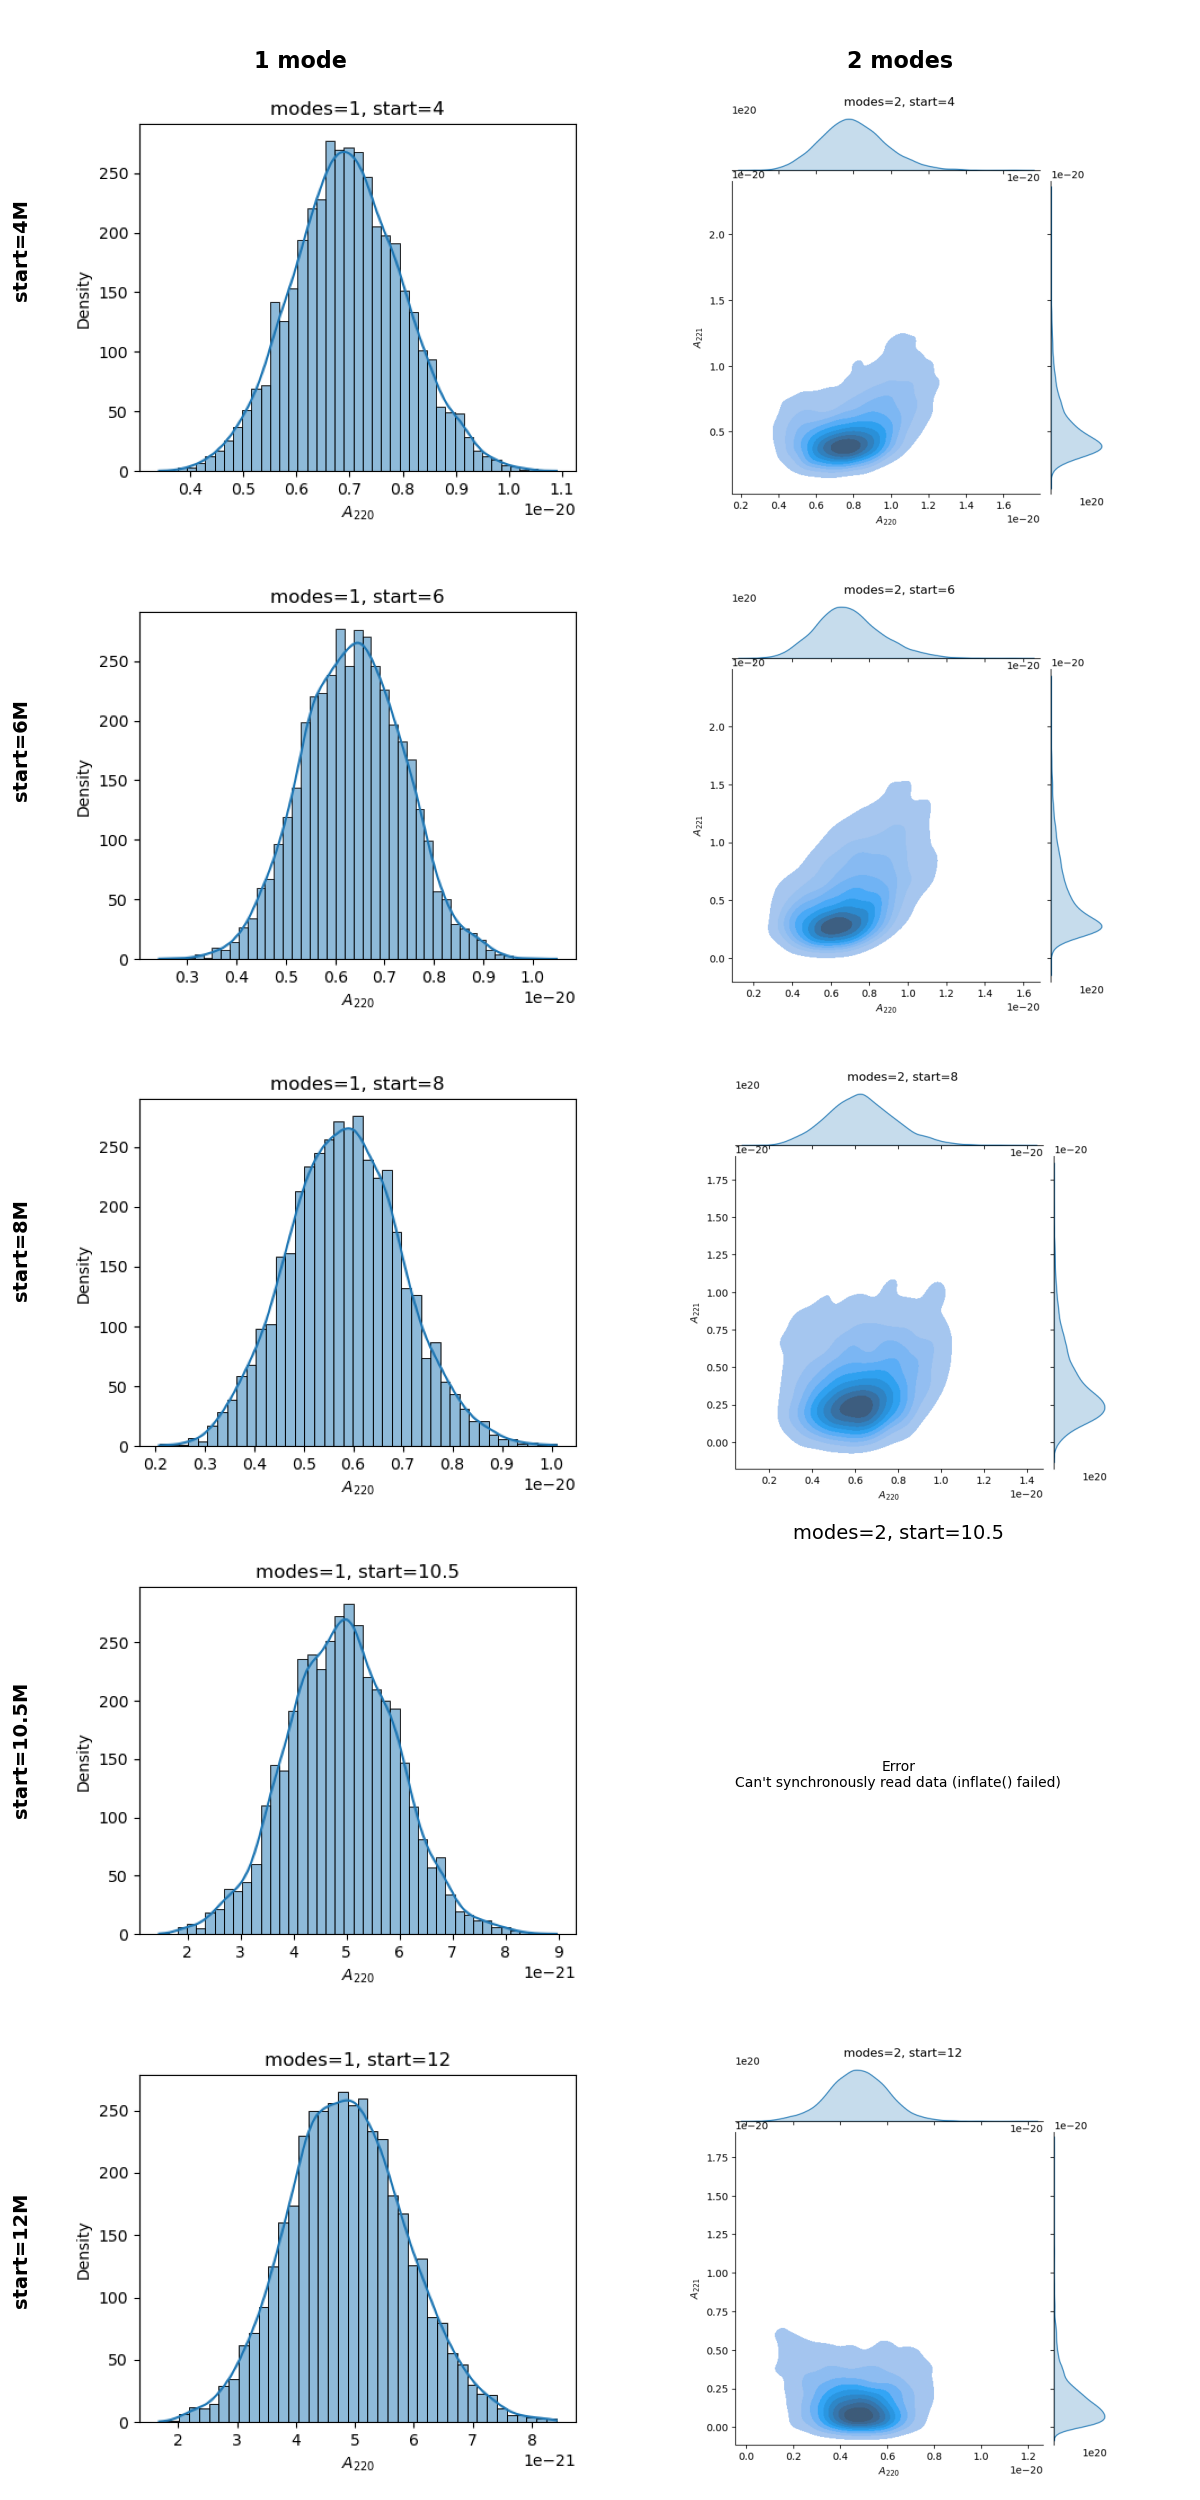

In [36]:
# AMPLITUDE PLOT
# Create main figure for the grid
fig, axs = plt.subplots(nrows=nrows, ncols=ncols,
                        figsize=(6 * ncols, 5 * nrows))
axs = np.atleast_2d(axs)

for i, start in enumerate(start_offsets):
    for j, modes in enumerate(num_modes):
        ax = axs[i, j]
        key = (start, modes)
        
        if key not in files:
            ax.text(0.5, 0.5, f"Missing\nstart={start}\nmodes={modes}", 
                   ha='center', va='center', fontsize=12)
            ax.axis('off')
            continue

        path = files[key]
        
        try:
            res = Result.from_netcdf(path)
            df = res.get_parameter_dataframe()
            
            if modes == 1:
                # For single mode, just plot the distribution of a_220
                temp_fig, temp_ax = plt.subplots(figsize=(5, 4))
                sns.histplot(df['a_220'], kde=True, ax=temp_ax)
                temp_ax.set_xlabel('$A_{220}$')
                temp_ax.set_ylabel('Density')
                temp_ax.set_title(f"modes={modes}, start={start}")
            else:
                # For multiple modes, create jointplot
                g = sns.jointplot(x=df['a_220'], y=df['a_221'], kind='kde', fill=True)
                g.ax_joint.set_xlabel('$A_{220}$')
                g.ax_joint.set_ylabel('$A_{221}$')
                g.fig.suptitle(f"modes={modes}, start={start}", y=1.02)
                temp_fig = g.fig
            
            # Convert the plot to an image
            buf = BytesIO()
            temp_fig.savefig(buf, format='png', dpi=100, bbox_inches='tight')
            buf.seek(0)
            plt.close(temp_fig)  # Close to avoid displaying it separately
            
            # Display the image in the grid
            img = Image.open(buf)
            ax.imshow(np.array(img))
            ax.axis('off')
            
        except Exception as e:
            ax.text(0.5, 0.5, f"Error\n{str(e)[:100]}", 
                   ha='center', va='center', fontsize=10, wrap=True)
            ax.axis('off')
            ax.set_title(f"modes={modes}, start={start}", fontsize=14, pad=10)
            print(f"Error for modes={modes}, start={start}: {e}")

# Add column labels
for j, modes in enumerate(num_modes):
    fig.text((j + 0.5) / ncols, 0.98, f"{modes} mode{'s' if modes > 1 else ''}", 
             ha='center', va='top', fontsize=16, weight='bold',
             transform=fig.transFigure)

# Add row labels
for i, start in enumerate(start_offsets):
    fig.text(0.01, 1 - (i + 0.5) / nrows, f"start={start}M", 
             ha='left', va='center', fontsize=14, weight='bold',
             transform=fig.transFigure, rotation=90)

plt.tight_layout(rect=[0.02, 0, 1, 0.97])
plt.savefig('fitresults_plots/amplitude_plots_grid.png', dpi=150, bbox_inches='tight')
print("\nSaved combined plot to fitresults_plots/amplitude_plots_grid.png")

Error for modes=2, start=10.5: Can't synchronously read data (inflate() failed)

Saved combined plot to fitresults_plots/mode_parameter_plots_grid.png


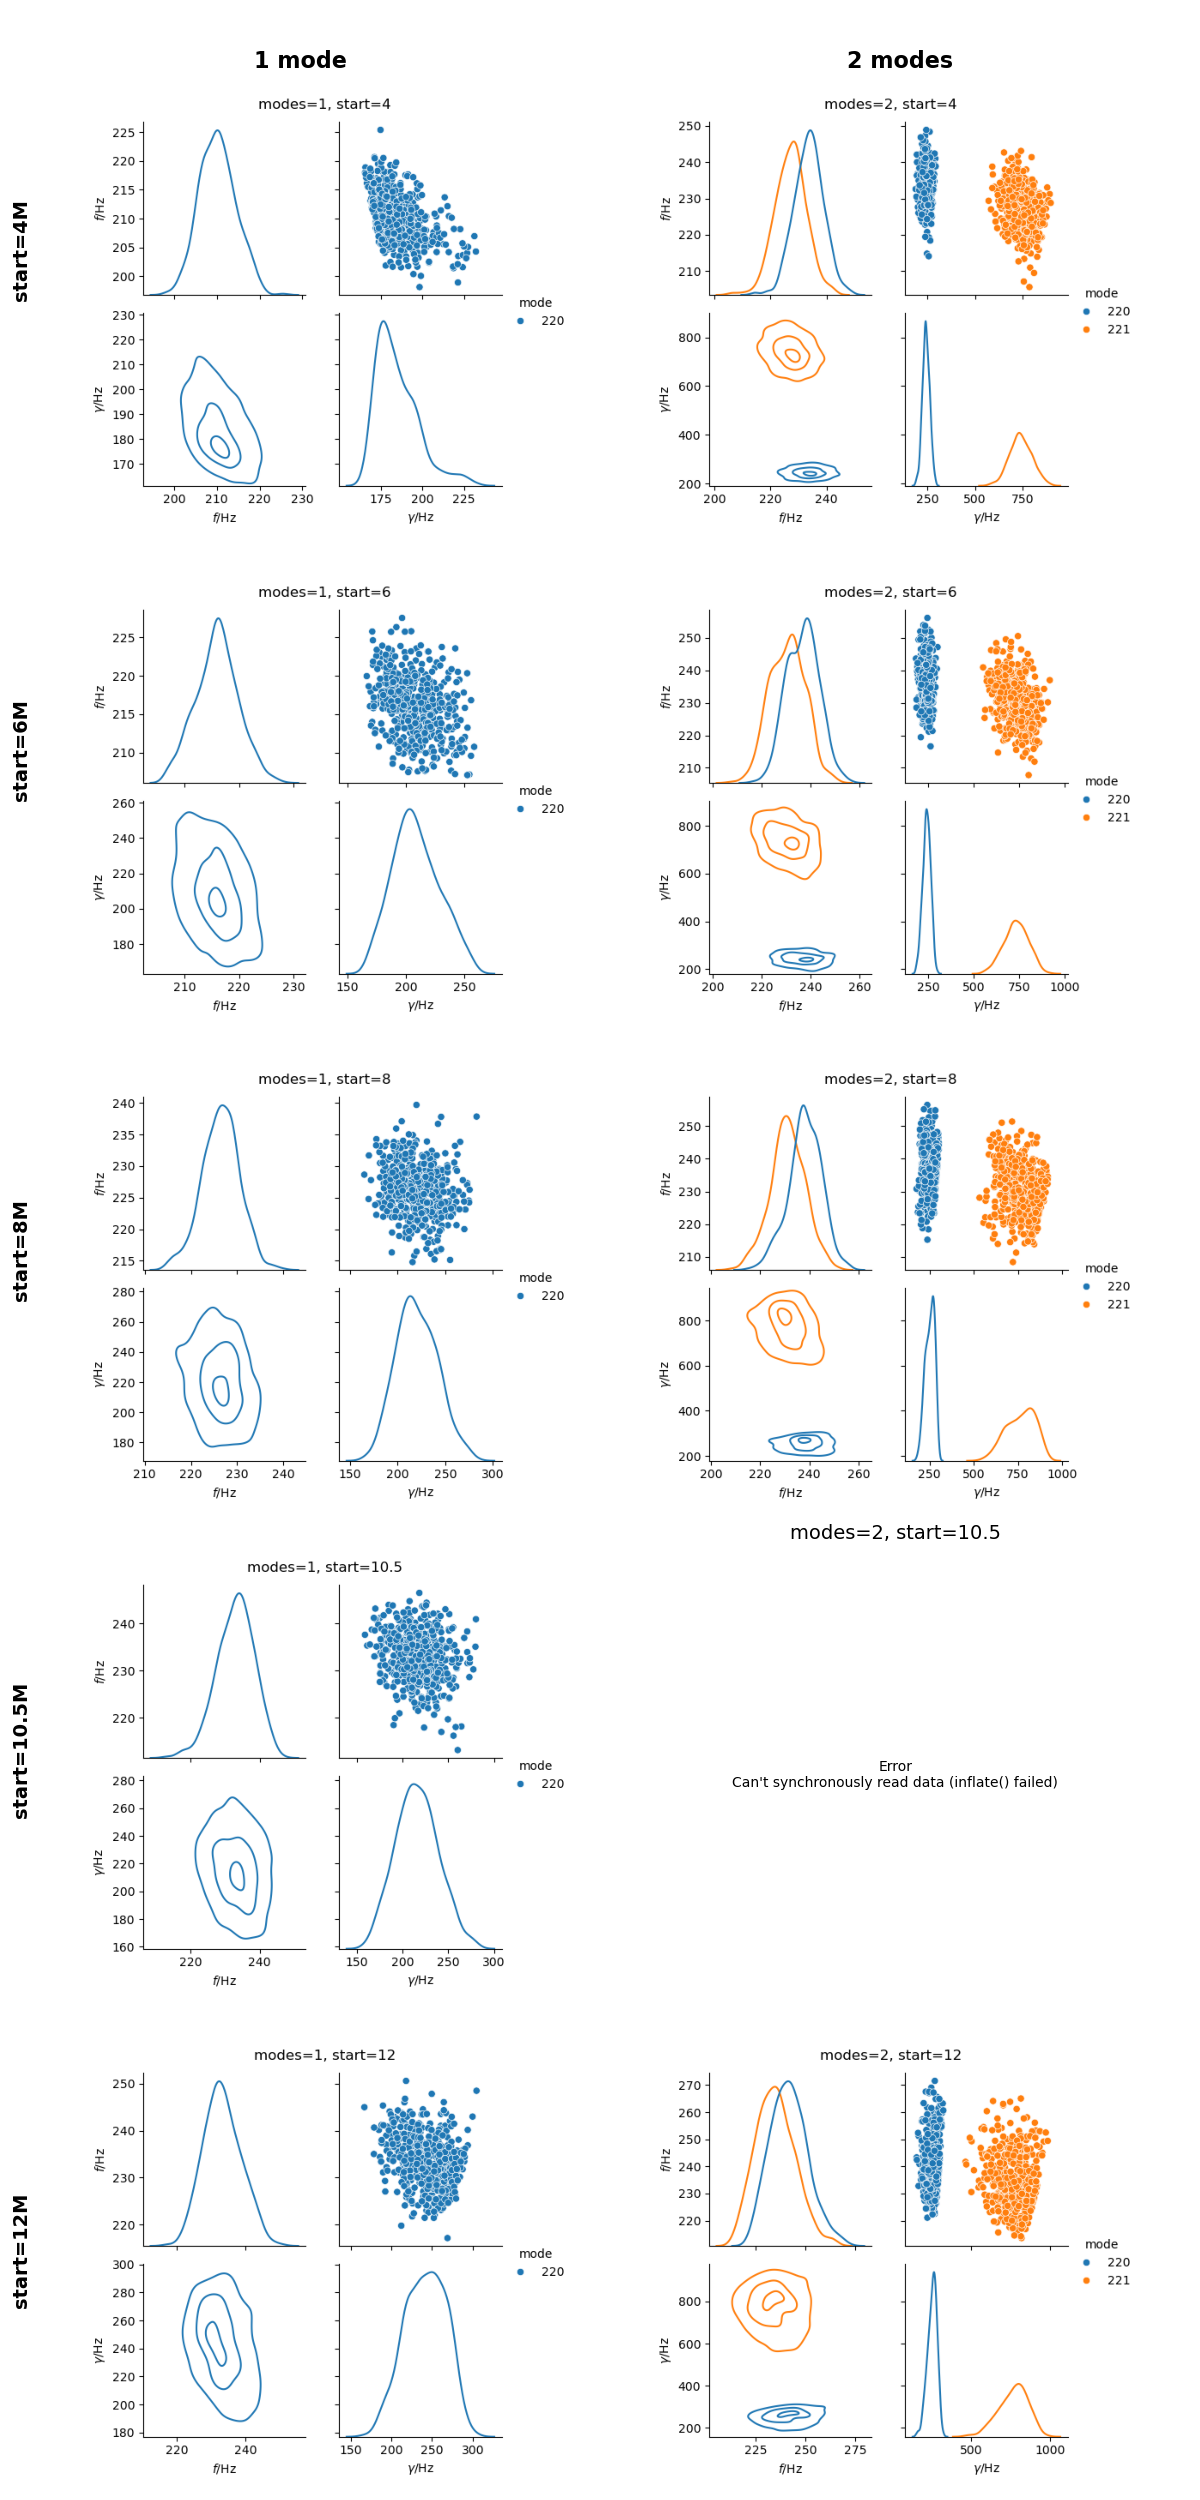

In [37]:
# FREQUENCY-DAMPING PLOT
# Create main figure for the grid
fig, axs = plt.subplots(nrows=nrows, ncols=ncols,
                        figsize=(6 * ncols, 5 * nrows))
axs = np.atleast_2d(axs)

for i, start in enumerate(start_offsets):
    for j, modes in enumerate(num_modes):
        ax = axs[i, j]
        key = (start, modes)
        
        if key not in files:
            ax.text(0.5, 0.5, f"Missing\nstart={start}\nmodes={modes}", 
                   ha='center', va='center', fontsize=12)
            ax.axis('off')
            continue

        path = files[key]
        
        try:
            res = Result.from_netcdf(path)
            df = res.get_mode_parameter_dataframe(500, latex=True)
            key_map = res.get_parameter_key_map(modes=False)
            
            # Create PairGrid
            pg = sns.PairGrid(df, vars=[key_map[k] for k in ['f', 'g']],
                             diag_sharey=False, hue='mode')
            pg.map_diag(sns.kdeplot)
            pg.map_upper(sns.scatterplot)
            pg.map_lower(rd.utils.kdeplot, levels=[0.9, 0.5, 0.1])
            pg.add_legend()
            pg.fig.suptitle(f"modes={modes}, start={start}", y=1.02)
            
            # Get the figure
            temp_fig = pg.fig
            
            # Convert the plot to an image
            buf = BytesIO()
            temp_fig.savefig(buf, format='png', dpi=100, bbox_inches='tight')
            buf.seek(0)
            plt.close(temp_fig)  # Close to avoid displaying it separately
            
            # Display the image in the grid
            img = Image.open(buf)
            ax.imshow(np.array(img))
            ax.axis('off')
            
        except Exception as e:
            ax.text(0.5, 0.5, f"Error\n{str(e)[:100]}", 
                   ha='center', va='center', fontsize=10, wrap=True)
            ax.axis('off')
            ax.set_title(f"modes={modes}, start={start}", fontsize=14, pad=10)
            print(f"Error for modes={modes}, start={start}: {e}")

# Add column labels
for j, modes in enumerate(num_modes):
    fig.text((j + 0.5) / ncols, 0.98, f"{modes} mode{'s' if modes > 1 else ''}", 
             ha='center', va='top', fontsize=16, weight='bold',
             transform=fig.transFigure)

# Add row labels
for i, start in enumerate(start_offsets):
    fig.text(0.01, 1 - (i + 0.5) / nrows, f"start={start}M", 
             ha='left', va='center', fontsize=14, weight='bold',
             transform=fig.transFigure, rotation=90)

plt.tight_layout(rect=[0.02, 0, 1, 0.97])
plt.savefig('fitresults_plots/mode_parameter_plots_grid.png', dpi=150, bbox_inches='tight')
print("\nSaved combined plot to fitresults_plots/mode_parameter_plots_grid.png")

Error for modes=2, start=10.5: Can't synchronously read data (inflate() failed)

Saved combined plot to fitresults_plots/strain_plots_grid.png


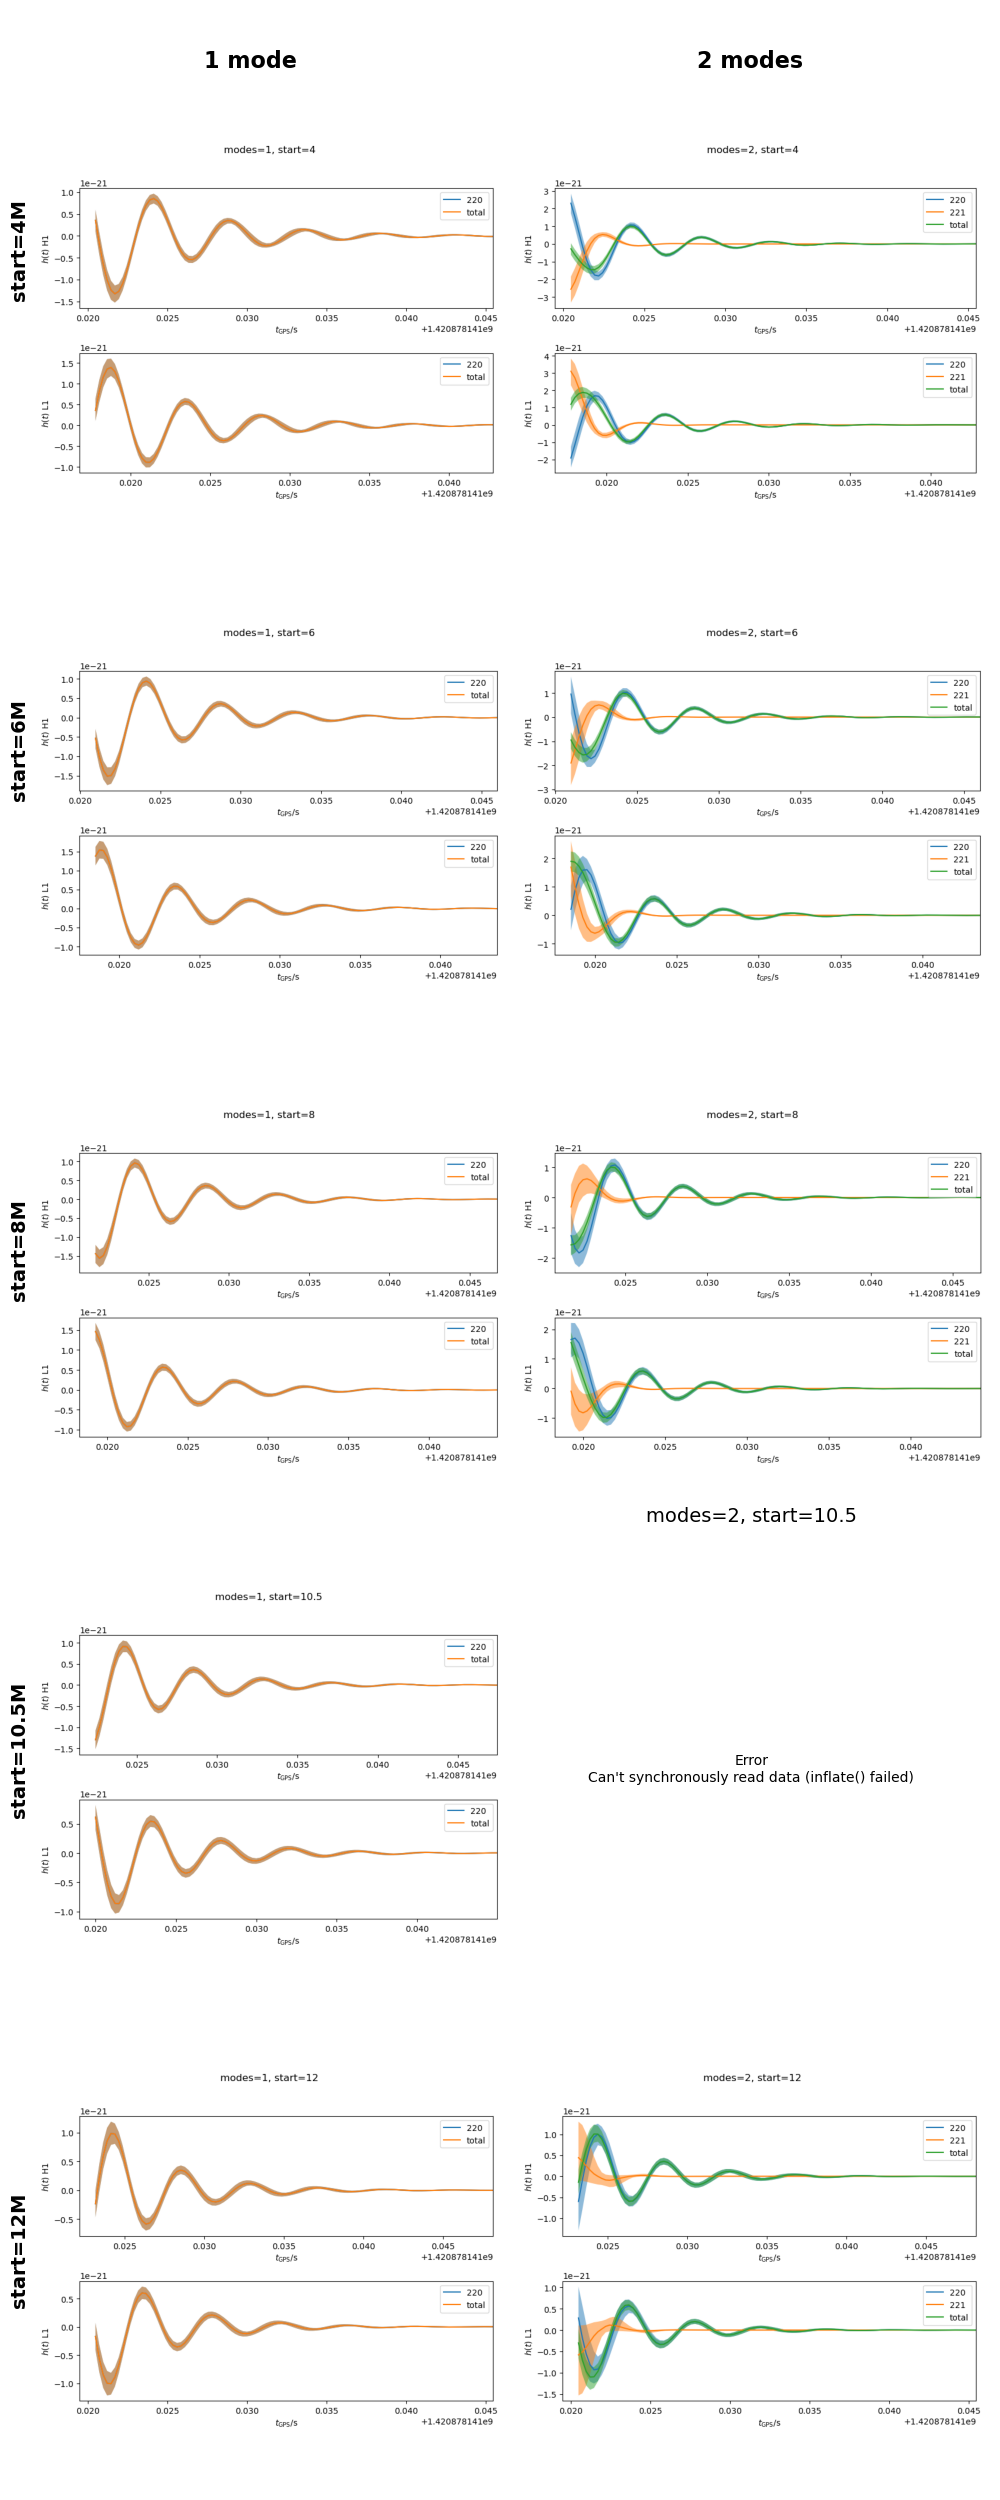

In [38]:
# STRAIN PLOT
# Create main figure for the grid
fig_main, axs_main = plt.subplots(nrows=nrows, ncols=ncols,
                                   figsize=(5 * ncols, 5 * nrows))
axs_main = np.atleast_2d(axs_main)

for i, start in enumerate(start_offsets):
    for j, modes in enumerate(num_modes):
        ax_main = axs_main[i, j]
        key = (start, modes)
        
        if key not in files:
            ax_main.text(0.5, 0.5, f"Missing\nstart={start}\nmodes={modes}", 
                        ha='center', va='center', fontsize=12)
            ax_main.axis('off')
            continue

        path = files[key]
        
        try:
            res = Result.from_netcdf(path)
            ifos = ['H1', 'L1']  # Define IFOs explicitly
            
            # Create strain plot - stack vertically instead of horizontally
            temp_fig, axs = plt.subplots(len(ifos), 1, figsize=(8, 6))
            axs = np.atleast_1d(axs)
            
            # Plot each mode
            for mode in res.modes:
                hdet_mode_cls = [res.get_strain_quantile(q, mode=mode) for q in [0.5, 0.05, 0.95]]
                for ifo, ax in zip(ifos, axs):
                    m, l, h = [hcl[ifo] for hcl in hdet_mode_cls]
                    ax.plot(m, label=mode.get_label())
                    ax.fill_between(m.index, l, h, alpha=0.5)
            
            # Plot total strain
            hdet_cls = [res.get_strain_quantile(q) for q in [0.5, 0.05, 0.95]]    
            for ifo, ax in zip(ifos, axs):
                m, l, h = [hcl[ifo] for hcl in hdet_cls]
                
                ax.plot(m, label='total')
                ax.fill_between(m.index, l, h, alpha=0.5)
                
                # Set xlim based on the time index
                t_start = m.index.min()
                ax.set_xlim(t_start - 0.001, t_start + 0.025)
                
                ax.set_xlabel(r'$t_\mathrm{GPS} / \mathrm{s}$')
                ax.set_ylabel(f'$h(t)$ {ifo}')
                ax.legend()
            
            temp_fig.suptitle(f"modes={modes}, start={start}", y=1.02)
            temp_fig.tight_layout()
            
            # Convert the plot to an image
            buf = BytesIO()
            temp_fig.savefig(buf, format='png', dpi=100, bbox_inches='tight')
            buf.seek(0)
            plt.close(temp_fig)  # Close to avoid displaying it separately
            
            # Display the image in the grid
            img = Image.open(buf)
            ax_main.imshow(np.array(img))
            ax_main.axis('off')
            
        except Exception as e:
            ax_main.text(0.5, 0.5, f"Error\n{str(e)[:150]}", 
                        ha='center', va='center', fontsize=10, wrap=True)
            ax_main.axis('off')
            ax_main.set_title(f"modes={modes}, start={start}", fontsize=14, pad=10)
            print(f"Error for modes={modes}, start={start}: {e}")

# Add column labels
for j, modes in enumerate(num_modes):
    fig_main.text((j + 0.5) / ncols, 0.98, f"{modes} mode{'s' if modes > 1 else ''}", 
                  ha='center', va='top', fontsize=16, weight='bold',
                  transform=fig_main.transFigure)

# Add row labels
for i, start in enumerate(start_offsets):
    fig_main.text(0.01, 1 - (i + 0.5) / nrows, f"start={start}M", 
                  ha='left', va='center', fontsize=14, weight='bold',
                  transform=fig_main.transFigure, rotation=90)

plt.tight_layout(rect=[0.02, 0, 1, 0.97])
plt.savefig('fitresults_plots/strain_plots_grid.png', dpi=150, bbox_inches='tight')
print("\nSaved combined plot to fitresults_plots/strain_plots_grid.png")

Error for modes=2, start=10.5: Can't synchronously read data (inflate() failed)

Saved combined plot to fitresults_plots/area_plots_grid.png


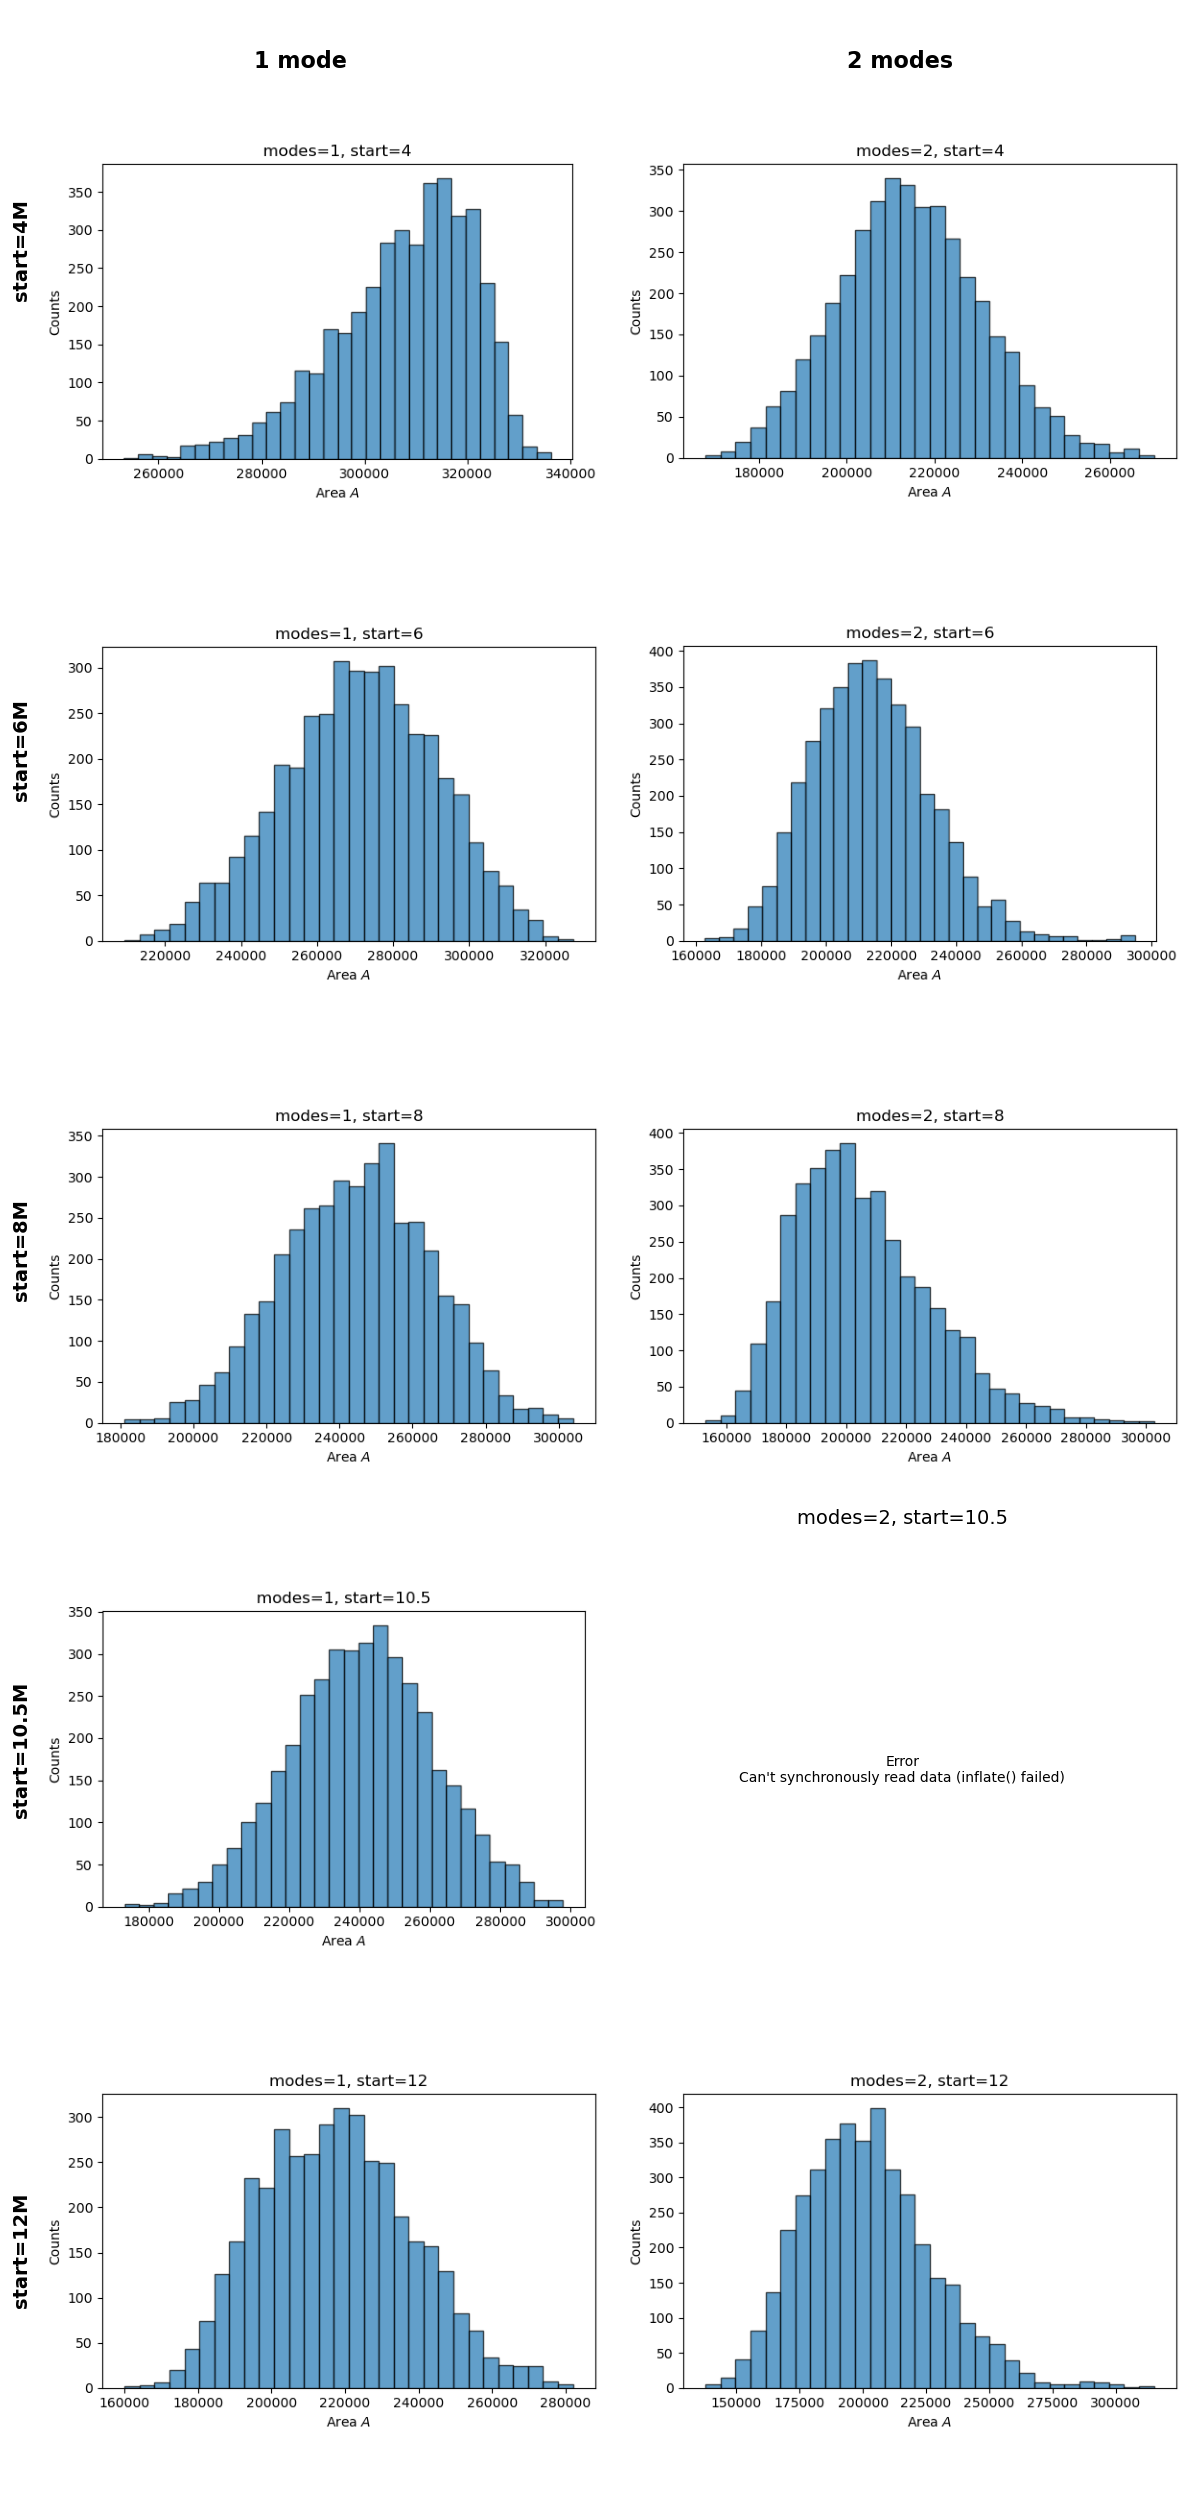

In [39]:
# AREA PLOT
# Create main figure for the grid
fig_main, axs_main = plt.subplots(nrows=nrows, ncols=ncols,
                                   figsize=(6 * ncols, 5 * nrows))
axs_main = np.atleast_2d(axs_main)

for i, start in enumerate(start_offsets):
    for j, modes in enumerate(num_modes):
        ax_main = axs_main[i, j]
        key = (start, modes)
        
        if key not in files:
            ax_main.text(0.5, 0.5, f"Missing\nstart={start}\nmodes={modes}", 
                        ha='center', va='center', fontsize=12)
            ax_main.axis('off')
            continue

        path = files[key]
        
        try:
            res = Result.from_netcdf(path)
            
            # Extract mass and spin posteriors
            m_post = np.array(res.posterior['m']).flatten()
            chi_post = np.array(res.posterior['chi']).flatten()
            
            # Calculate area
            area = 8*np.pi*m_post**2*(1+np.sqrt(1-chi_post**2))
            
            # Create histogram
            temp_fig, temp_ax = plt.subplots(figsize=(6, 4))
            temp_ax.hist(area, bins=30, edgecolor='black', alpha=0.7)
            temp_ax.set_title(f'modes={modes}, start={start}')
            temp_ax.set_xlabel(r'Area $A$')
            temp_ax.set_ylabel('Counts')
            temp_fig.tight_layout()
            
            # Convert the plot to an image
            buf = BytesIO()
            temp_fig.savefig(buf, format='png', dpi=100, bbox_inches='tight')
            buf.seek(0)
            plt.close(temp_fig)  # Close to avoid displaying it separately
            
            # Display the image in the grid
            img = Image.open(buf)
            ax_main.imshow(np.array(img))
            ax_main.axis('off')
            
        except Exception as e:
            ax_main.text(0.5, 0.5, f"Error\n{str(e)[:150]}", 
                        ha='center', va='center', fontsize=10, wrap=True)
            ax_main.axis('off')
            ax_main.set_title(f"modes={modes}, start={start}", fontsize=14, pad=10)
            print(f"Error for modes={modes}, start={start}: {e}")

# Add column labels
for j, modes in enumerate(num_modes):
    fig_main.text((j + 0.5) / ncols, 0.98, f"{modes} mode{'s' if modes > 1 else ''}", 
                  ha='center', va='top', fontsize=16, weight='bold',
                  transform=fig_main.transFigure)

# Add row labels
for i, start in enumerate(start_offsets):
    fig_main.text(0.01, 1 - (i + 0.5) / nrows, f"start={start}M", 
                  ha='left', va='center', fontsize=14, weight='bold',
                  transform=fig_main.transFigure, rotation=90)

plt.tight_layout(rect=[0.02, 0, 1, 0.97])
plt.savefig('fitresults_plots/area_plots_grid.png', dpi=150, bbox_inches='tight')
print("\nSaved combined plot to fitresults_plots/area_plots_grid.png")